### Curso de Python para Finanças Quantitativas

#### Aula 2 - Automação com Funções
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [1]:
# Carregando as bibliotecas necessarias

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Configuraçoes iniciais

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2021-04-12"

In [3]:
# Coleta dos dados

df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900


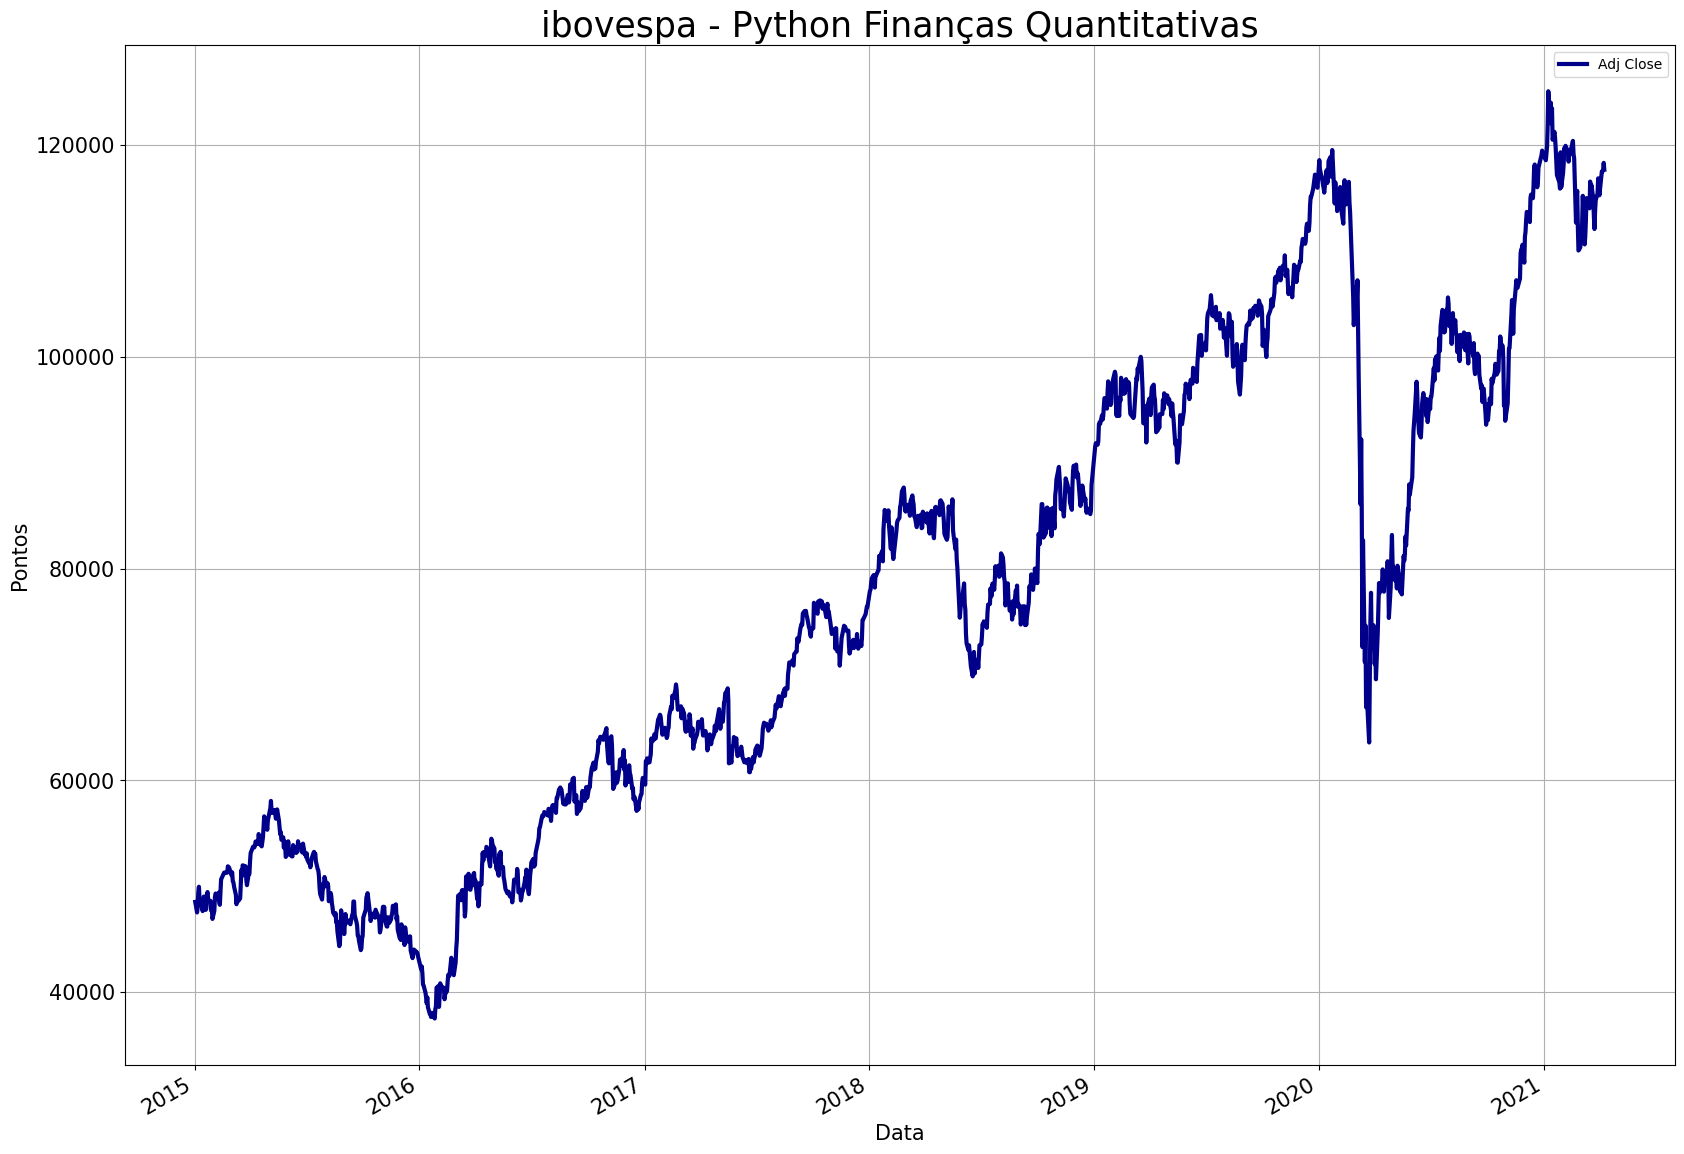

In [5]:
# Primeiro grafico

df["Adj Close"].plot(grid = True, figsize = (20, 15), linewidth = 3, fontsize = 15, color = "darkblue")
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25);
plt.legend();

In [6]:
# Calculando as bandas de bollinger

# Parametros iniciais
periodo = 50
desvios = 2

df["desvio"] = df["Adj Close"].rolling(periodo).std()
df["MM"] = df["Adj Close"].rolling(periodo).mean()
df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)

In [7]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

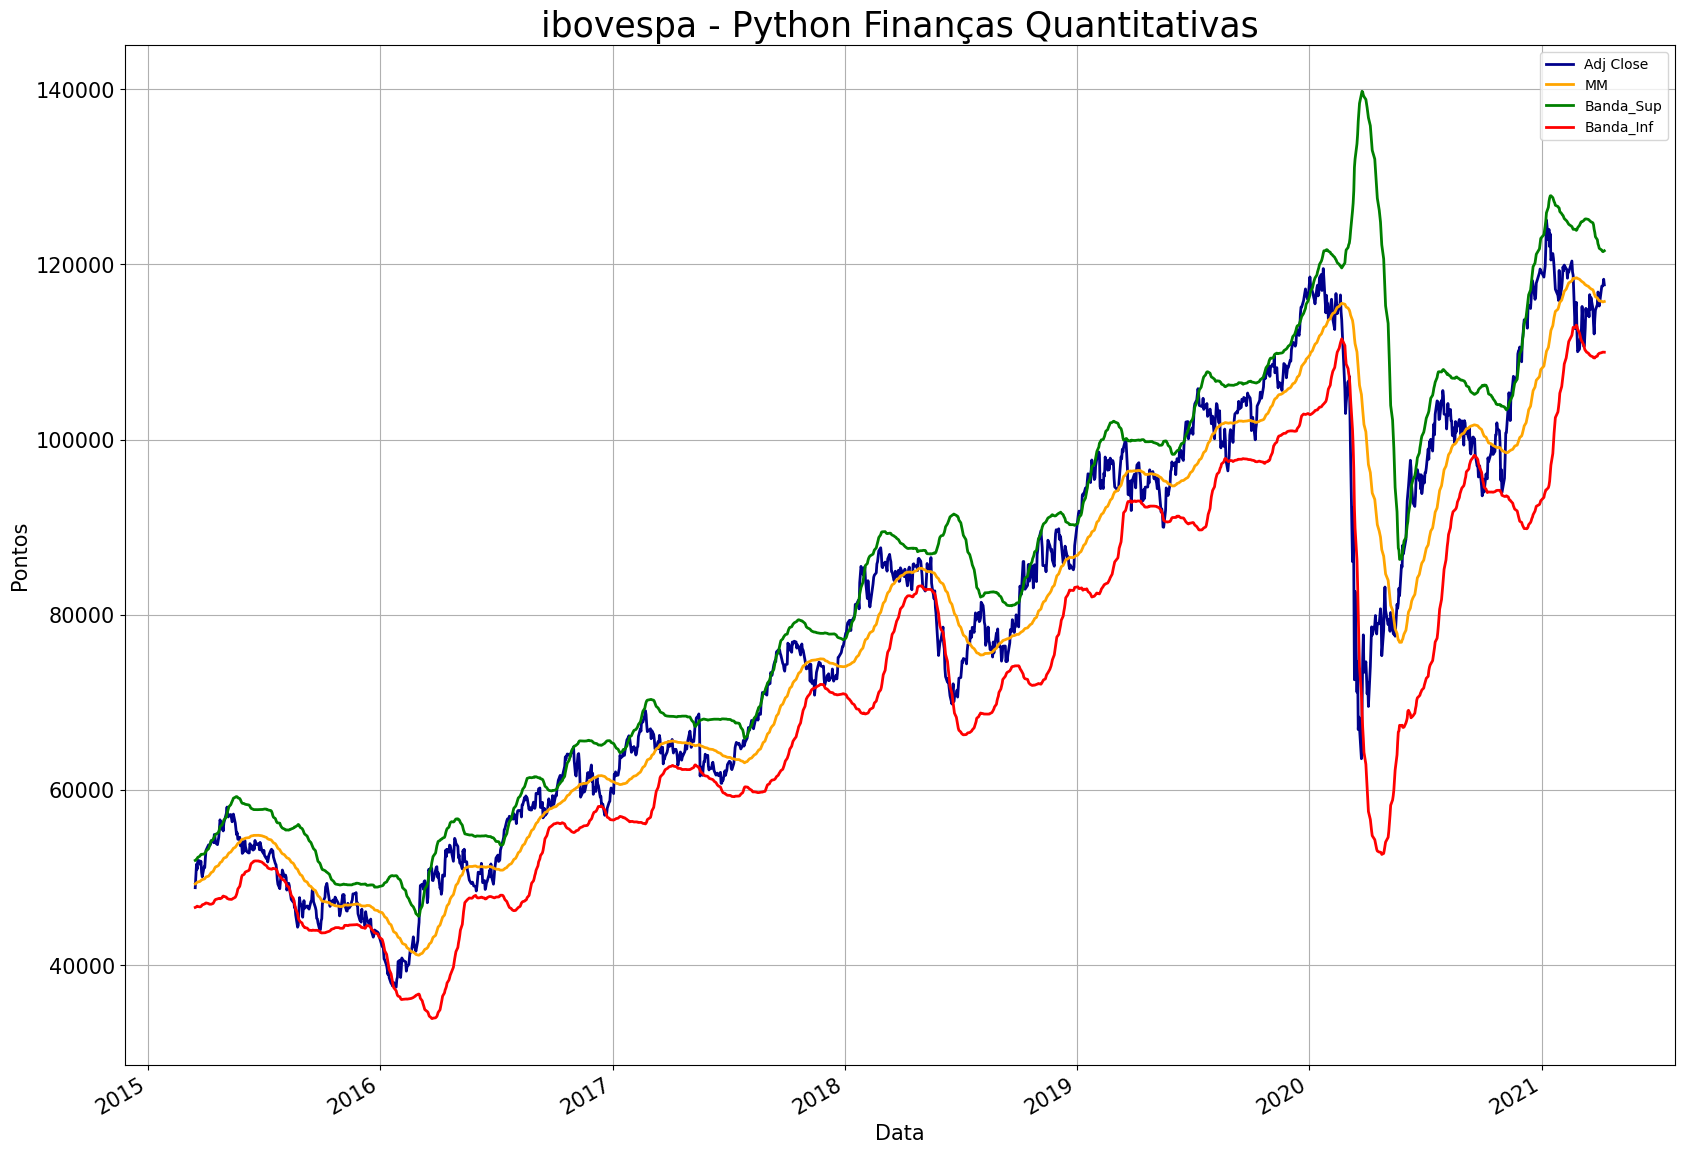

In [8]:
# Inserindo tudo no grafico


df[["Adj Close", "MM", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 15)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "red"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

In [9]:
# Construcao dos alvos

periodos = 5

# Alvo - Retorno
df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos)

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2015-03-16,48602.0,49205.0,48394.0,48848.0,48848.0,3155400,1342.718632,49279.32,51964.757264,46593.882736,NaN,0.062643
2015-03-17,48849.0,50384.0,48841.0,50285.0,50285.0,4013900,1345.449736,49314.78,52005.679471,46623.880529,NaN,0.024282
2015-03-18,50284.0,51773.0,49788.0,51526.0,51526.0,4458900,1355.544577,49394.96,52106.049154,46683.870846,NaN,0.006443
2015-03-19,51530.0,51547.0,50791.0,50954.0,50954.0,3263600,1357.899270,49454.02,52169.818541,46738.221459,NaN,-0.007340
2015-03-20,50964.0,52286.0,50964.0,51967.0,51967.0,4916800,1403.641172,49504.10,52311.382345,46696.817655,NaN,-0.036023


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2021-04-05,115262.0,117668.0,115262.0,117518.0,117518.0,7245100,2925.229994,115783.18,121633.639988,109932.720012,0.023845,NaN
2021-04-06,117519.0,118213.0,117176.0,117499.0,117499.0,6800800,2881.091729,115739.00,121501.183458,109976.816542,0.018021,NaN
2021-04-07,117499.0,118303.0,116748.0,117624.0,117624.0,0,2867.701852,115722.62,121458.023705,109987.216295,0.006624,NaN
2021-04-08,117624.0,118850.0,117486.0,118313.0,118313.0,8778200,2883.964499,115745.44,121513.368998,109977.511002,0.014395,NaN
2021-04-09,118313.0,118643.0,117336.0,117670.0,117670.0,7739400,2895.118426,115769.56,121559.796852,109979.323148,0.020971,NaN


In [12]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

In [13]:
# Criando a regra de trade

df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

In [14]:
# Aplicando a regra no alvo

df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]

In [15]:
# Calculando o resultado acumulado em juros simples

df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()

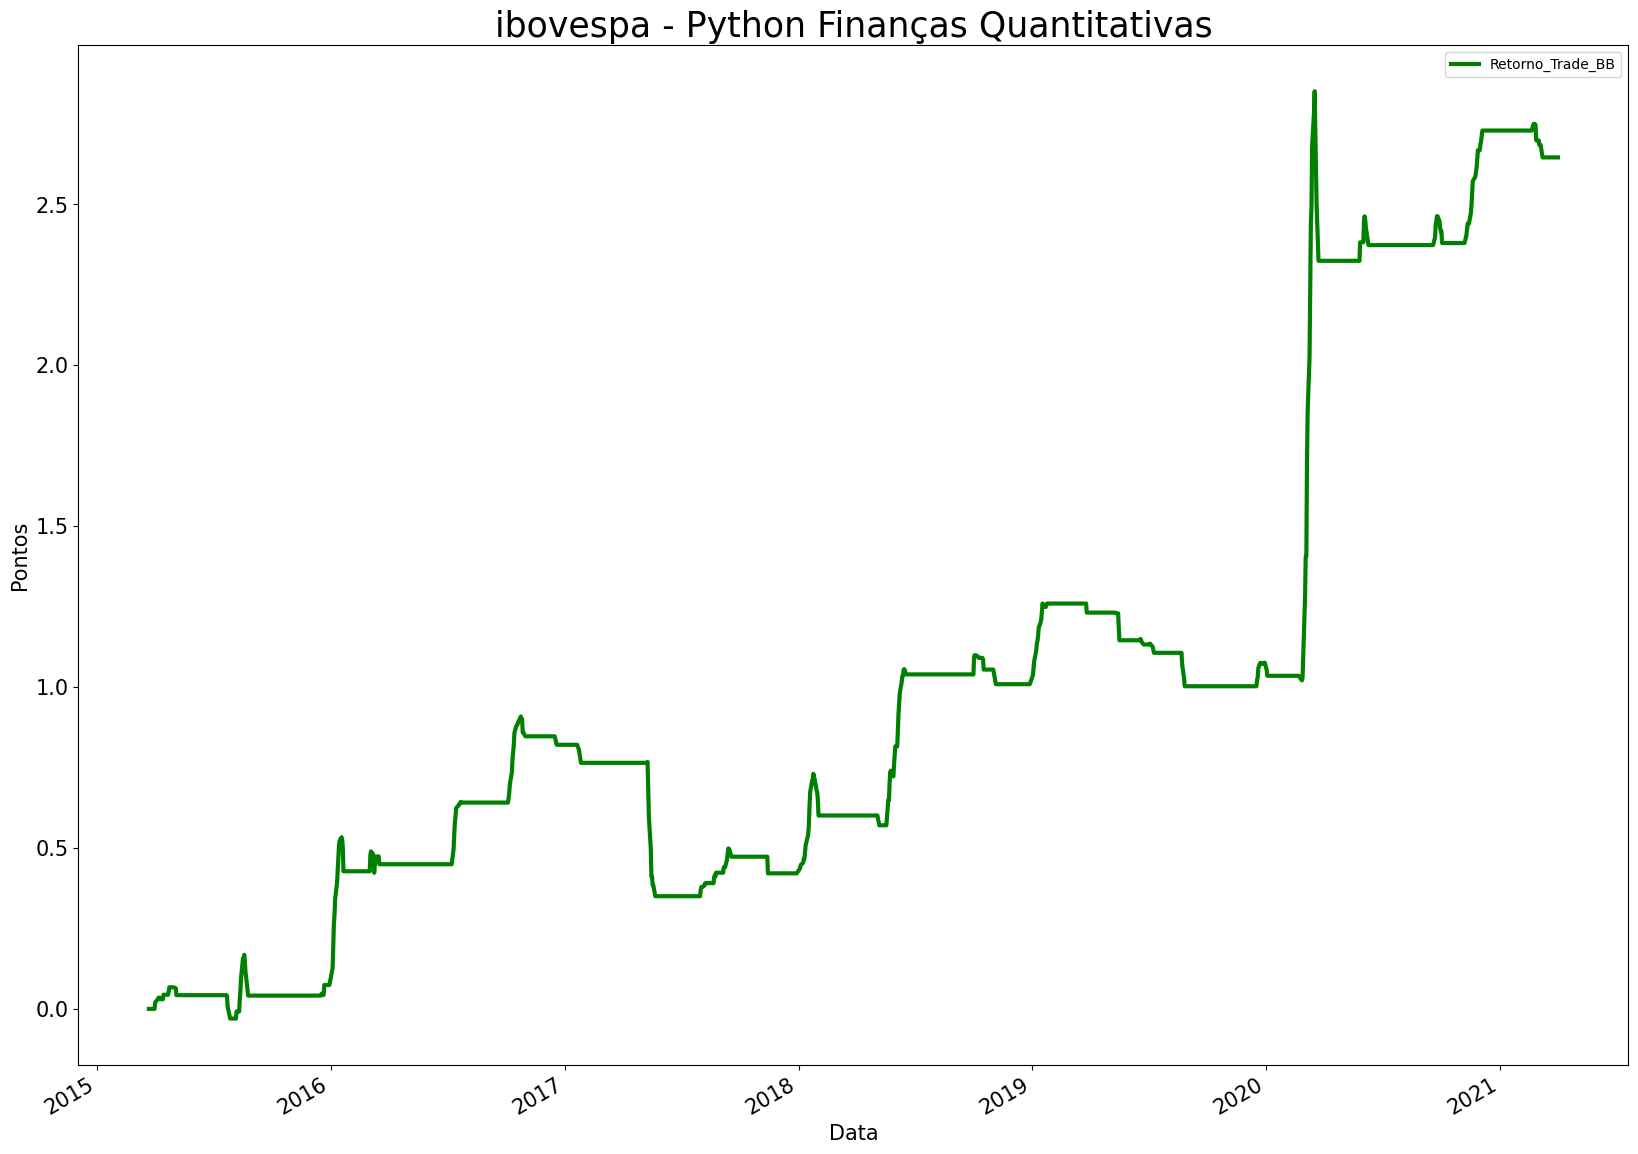

In [16]:
df["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

___________________________________________

### Automação com Funções

In [17]:
def minha_funcao(x, y):
    return(x*y)

In [18]:
minha_funcao(2, 3)

6

In [19]:
a = 2
b = 10

minha_funcao(a, b)

20

In [20]:
def om_bollinger(ticker, periodo, desvios, inicio, fim, alvo):
    
    df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)
    df["desvio"] = df["Adj Close"].rolling(periodo).std()
    df["MM"] = df["Adj Close"].rolling(periodo).mean()
    df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
    df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Construcao dos alvos
    df.loc[:, "Retorno"] = df["Adj Close"].pct_change(alvo)
    df.loc[:, "Alvo"] = df["Retorno"].shift(-alvo)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Criando a regra de trade
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

    # Aplicando a regra no alvo
    df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]
    
    # Calculando o resultado acumulado em juros simples
    df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()
    
    return(df)

In [21]:
# Parametros da funçao

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2021-04-12"
periodo = 50
desvios = 2
alvo = 5

In [22]:
# Chamada da funçao

om_bollinger(ticker, periodo, desvios, inicio, fim, alvo)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo,Regra,Trade,Retorno_Trade_BB
Date,,,,,,,,,,,,,,,
2015-03-23,51970.0,52178.0,51516.0,51908.0,51908.0,3397500,1443.133609,49543.40,52429.667217,46657.132783,0.062643,-0.012811,0,-0.0,-0.000000
2015-03-24,51908.0,52223.0,51006.0,51506.0,51506.0,3436500,1465.689028,49596.72,52528.098057,46665.341943,0.024282,-0.006912,0,-0.0,-0.000000
2015-03-25,51507.0,52319.0,51507.0,51858.0,51858.0,4774600,1484.469641,49671.08,52640.019283,46702.140717,0.006443,0.008948,0,0.0,0.000000
2015-03-26,51835.0,51835.0,50528.0,50580.0,50580.0,3638500,1470.958737,49721.84,52663.757474,46779.922526,-0.007340,0.050277,0,0.0,0.000000
2015-03-27,50575.0,50575.0,49909.0,50095.0,50095.0,3927700,1440.892902,49770.82,52652.605804,46889.034196,-0.036023,0.072702,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,113750.0,115416.0,113305.0,114781.0,114781.0,8659500,3424.374903,116308.46,123157.209806,109459.710194,-0.012399,0.023845,0,0.0,2.645047
2021-03-29,114776.0,115553.0,114096.0,115419.0,115419.0,7463300,3324.782227,116176.04,122825.604454,109526.475546,0.003827,0.018021,0,0.0,2.645047
2021-03-30,115414.0,117090.0,114999.0,116850.0,116850.0,8141600,3155.387502,116043.42,122354.195005,109732.644995,0.031679,0.006624,0,0.0,2.645047


In [23]:
# E se eu quiser apenas o resultado?


# Pega a ùltima linha de cada coluna
om_bollinger(ticker, periodo, desvios, inicio, fim, alvo).iloc[-1]

[*********************100%%**********************]  1 of 1 completed


Open                1.166440e+05
High                1.170880e+05
Low                 1.149910e+05
Close               1.152530e+05
Adj Close           1.152530e+05
Volume              8.009200e+06
desvio              2.996574e+03
MM                  1.158463e+05
Banda_Sup           1.218394e+05
Banda_Inf           1.098531e+05
Retorno             1.321319e-02
Alvo                2.097125e-02
Regra               0.000000e+00
Trade               0.000000e+00
Retorno_Trade_BB    2.645047e+00
Name: 2021-04-01 00:00:00, dtype: float64

In [24]:
# Pega o ùltimo elemento da ùltima linha e coluna

om_bollinger(ticker, periodo, desvios, inicio, fim, alvo).iloc[-1][-1]

[*********************100%%**********************]  1 of 1 completed


2.6450471382981364

In [25]:
def om_bollinger_resultado(ticker, periodos, desvios, inicio, fim, alvo):
    
    df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)
    df["desvio"] = df["Adj Close"].rolling(periodo).std()
    df["MM"] = df["Adj Close"].rolling(periodo).mean()
    df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
    df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Construcao dos alvos
    df.loc[:, "Retorno"] = df["Adj Close"].pct_change(alvo)
    df.loc[:, "Alvo"] = df["Retorno"].shift(-alvo)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Criando a regra de trade
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

    # Aplicando a regra no alvo
    df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]
    
    # Calculando o resultado acumulado em juros simples
    df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()
    
    return(df.iloc[-1][-1])

In [26]:
om_bollinger_resultado(ticker, periodo, desvios, inicio, fim, alvo)

[*********************100%%**********************]  1 of 1 completed


2.6450471382981364

In [27]:
# Vamos testar multiplos resultados?


# Uso o print apenas para exibir os 2 resultados em uma mesma cèlula do notebook

print(om_bollinger_resultado(ticker, 20, 1, inicio, fim, 5))
print(om_bollinger_resultado(ticker, 20, 3, inicio, fim, 5))

[*********************100%%**********************]  1 of 1 completed
2.769494578577863
[*********************100%%**********************]  1 of 1 completed
1.0338450094733729


In [28]:
# Funçao para plotar o grafico

def plot_resultado(data_frame):
    data_frame["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
    plt.xlabel("Data"
           , fontsize = 15);
    plt.ylabel("Pontos"
           , fontsize = 15);
    plt.title("Resultado BB Trading - Python Finanças Quantitativas"
           , fontsize = 25)
    plt.legend();

In [29]:
dados = om_bollinger(ticker, periodo, desvios, inicio, fim, alvo)

[*********************100%%**********************]  1 of 1 completed


In [30]:
dados

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo,Regra,Trade,Retorno_Trade_BB
Date,,,,,,,,,,,,,,,
2015-03-23,51970.0,52178.0,51516.0,51908.0,51908.0,3397500,1443.133609,49543.40,52429.667217,46657.132783,0.062643,-0.012811,0,-0.0,-0.000000
2015-03-24,51908.0,52223.0,51006.0,51506.0,51506.0,3436500,1465.689028,49596.72,52528.098057,46665.341943,0.024282,-0.006912,0,-0.0,-0.000000
2015-03-25,51507.0,52319.0,51507.0,51858.0,51858.0,4774600,1484.469641,49671.08,52640.019283,46702.140717,0.006443,0.008948,0,0.0,0.000000
2015-03-26,51835.0,51835.0,50528.0,50580.0,50580.0,3638500,1470.958737,49721.84,52663.757474,46779.922526,-0.007340,0.050277,0,0.0,0.000000
2015-03-27,50575.0,50575.0,49909.0,50095.0,50095.0,3927700,1440.892902,49770.82,52652.605804,46889.034196,-0.036023,0.072702,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,113750.0,115416.0,113305.0,114781.0,114781.0,8659500,3424.374903,116308.46,123157.209806,109459.710194,-0.012399,0.023845,0,0.0,2.645047
2021-03-29,114776.0,115553.0,114096.0,115419.0,115419.0,7463300,3324.782227,116176.04,122825.604454,109526.475546,0.003827,0.018021,0,0.0,2.645047
2021-03-30,115414.0,117090.0,114999.0,116850.0,116850.0,8141600,3155.387502,116043.42,122354.195005,109732.644995,0.031679,0.006624,0,0.0,2.645047


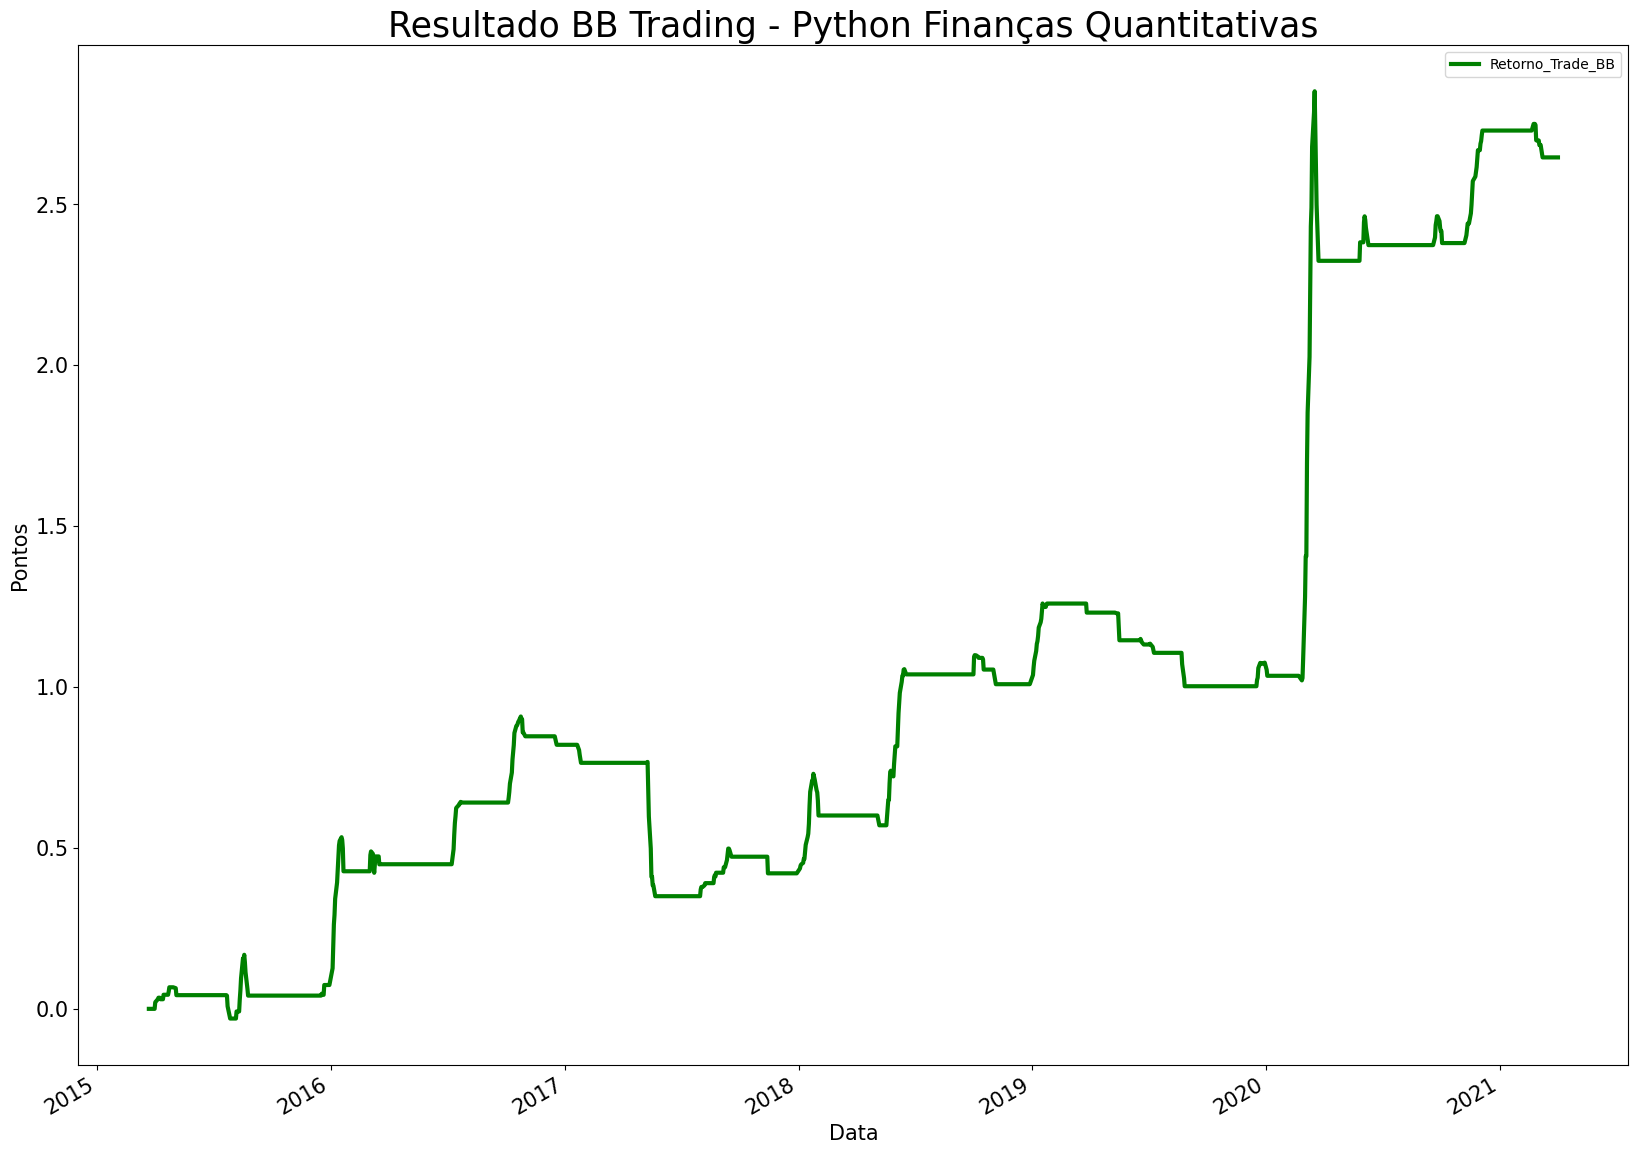

In [31]:
plot_resultado(dados)